다중손잡이 밴딧문제

OpenAPI재단 제공 GYM 라이브러리

다중손잡이 밴딧문제
  - $1을 넣고 여러손잡이중 하나를 골라 당기면 $1 잃거나 땀
  - 손잡이 마다 승률이 정해져 있으나 사용자는 모름
  - 행동집합 = {손잡이1,손잡이2,손잡이3,손잡이4,손잡이5}
  - 보상의 집합 = {-1,1}
  - 행동->보상 사이클

행동->상태변화->보상 사이클에서 상태가 없는 단순한 문제

정책
  - 탐험형 정책, 탐사형 정책
  - 양 극단
    - 처음부터 끝까지 무작위로 선택하는 극단적인 탐험형 정책
    - 몇번 시도해 보고 이후에는 그때까지의 승률이 가장 높은 손잡이만 당기는 탐사형
  - 둘 사이의 균형이 중요함
    - 현재 가장 높은 확률을 보인 손잡이를 더 자주 당기지만 일정한 비율로 다른 손잡이도 시도하는 정책

- 에피소드(episode) : 게임을 시작해서 마칠때까지의 기록
- 에피소드가 충분히 길면 최적정책을 알아낼수 있음
- 현실은 그렇지 않다.

랜덤정책을 쓰는 알고리즘

In [1]:
import numpy as np
arms_profit = [0.4, 0.12, 0.52, 0.6, 0.25]  # 손잡이 승률(사용자는 모름)
n_arms = len(arms_profit)
n_trial = 10000

# 손잡이를 당기는 시뮬레이션
def pull_bandit(handle):  # handle 손잡이 번호
  q = np.random.random()
  if q < arms_profit[handle]:
    return 1
  else:
    return -1

In [2]:
# 랜덤정책 모방
def random_exploration():
  episode = []
  num = np.zeros(n_arms)  # 손잡이 별로 당긴 횟수
  wins = np.zeros(n_arms)  # 손잡이 별로 승리 횟수
  for i in range(n_trial):
    h = np.random.randint(0,n_arms)# 0~ 4까지 임의의 수== 핸들 번호
    reward = pull_bandit(h)
    episode.append([h,reward])
    num[h] += 1
    wins[h] +=1 if reward== 1 else 0
  return episode,(num,wins)

In [3]:
e,r = random_exploration()

In [4]:
r

(array([1969., 2031., 1988., 1960., 2052.]),
 array([ 790.,  251., 1019., 1134.,  507.]))

In [5]:
print("손잡이별 승리 확률 : ", ["%6.4f"%( r[1][i] / r[0][i]) if r[0][i] > 0 else 0.0  for i in range(n_arms)] )
print("손잡이별 수익 : ", [ 2*r[1][i]-r[0][i]  for i in range(n_arms) ] )
print("순 수익 : ", sum(np.asarray(e)[:,1]) )

손잡이별 승리 확률 :  ['0.4012', '0.1236', '0.5126', '0.5786', '0.2471']
손잡이별 수익 :  [-389.0, -1529.0, 50.0, 308.0, -1038.0]
순 수익 :  -2598


 E(epsilon) - 탐욕 알고리즘(greedy algorithm)
  - 과거와 미래를 전혀 고려하지 않고 현재 순간의 정보만 가지고 현재 최고 유리한 선택을 하는 알고리즘
  - 탐사형에 가까운 알고리즘
  - 기본적으로 탐욕알고리즘을 취하는데 E 비율만큼 탐험을 적용해서 탐사와 탐험의  균형을 추가

In [6]:
def epsilon_greedy(eps):
  episode = []
  num = np.zeros(n_arms)  # 손잡이 별로 당긴 횟수
  wins = np.zeros(n_arms)  # 손잡이 별로 승리 횟수
  for i in range(n_trial):
    r = np.random.random()

    if(r < eps or sum(wins)==0):  #랜덤정책으로 손잡이를 선택
      h = np.random.randint(0,n_arms)# 0~ 4까지 임의의 수== 핸들 번호
    else:  # 이때까지 추정한 확률에 따라서 손잡이를 선택
      prob = np.asarray( [wins[i]/num[i] if num[i]>0 else 0.0 for i in range(n_arms)] )
      prob = prob / sum(prob)
      h = np.random.choice(range(n_arms), p = prob)

    reward = pull_bandit(h)
    episode.append([h,reward])
    num[h] += 1
    wins[h] +=1 if reward== 1 else 0
  return episode,(num,wins)

In [7]:
e,r = epsilon_greedy(0.1)
print("손잡이별 승리 확률 : ", ["%6.4f"%( r[1][i] / r[0][i]) if r[0][i] > 0 else 0.0  for i in range(n_arms)] )
print("손잡이별 수익 : ", [ 2*r[1][i]-r[0][i]  for i in range(n_arms) ] )
print("순 수익 : ", sum(np.asarray(e)[:,1]) )

손잡이별 승리 확률 :  ['0.4126', '0.1220', '0.5104', '0.6084', '0.2565']
손잡이별 수익 :  [-372.0, -626.0, 55.0, 662.0, -659.0]
순 수익 :  -940


몬테카를로 방법
  - 현실 세계의 현상 또는 수학적 현상을 난수를 생성해서 시뮬레이션 하는 기법
  - random_exploration, epsilon_greedy 함수도 몬테카를로 방법임  

OpenAI의 gym 라이브러리
  - OpenAI 재단이 만들어서 배포하는 라이브러리, 여러 강화학습 문제를 제공
  - FrozenLake, CartPole....

FrozenLake 문제
  - s에서 시작을 해서 g에 도착하면 이기는 게임
  - f는 얼어있어 밟고 지날수 있으나 h는 구멍이라서 빠지면 짐(f,h는 감춰져있음)
  - 4 x 4 행렬...
  - 현재 있는곳이 상태(16가지{0,1,2.. 15}), 좌우상하 이동이 행동(4가지행동{Left,Down,Right,Up})


  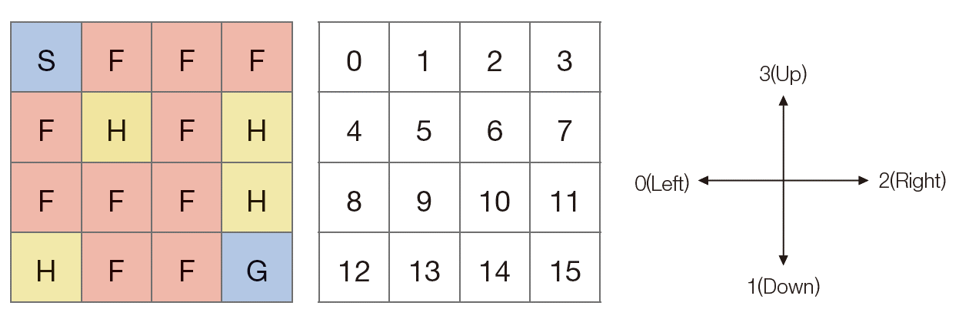

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Discrete(16)
Discrete(4)
에피소드 끝


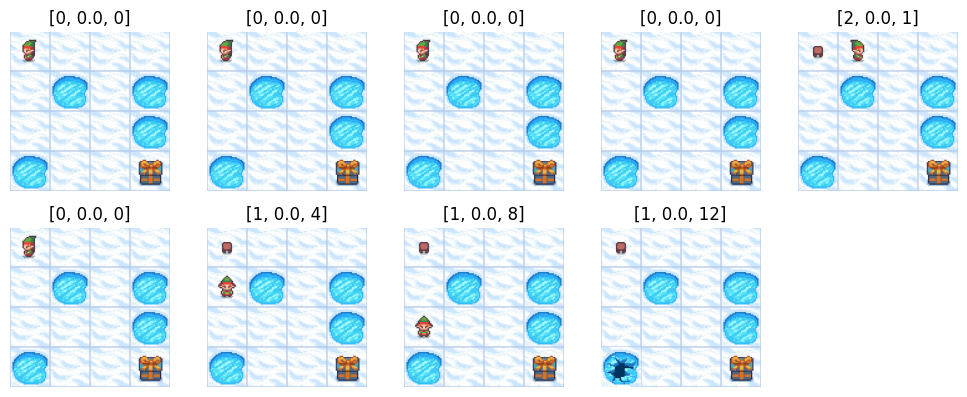

[[0, 0.0, 0], [0, 0.0, 0], [0, 0.0, 0], [0, 0.0, 0], [2, 0.0, 1], [0, 0.0, 0], [1, 0.0, 4], [1, 0.0, 8], [1, 0.0, 12]]


In [8]:
# https://www.gymlibrary.dev/environments/toy_text/frozen_lake/
import matplotlib.pyplot as plt

import gym
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
print(env.observation_space)
print(env.action_space)
n_trial = 20
# 에피소드 수집
env.reset()
episode = []
plt.figure(figsize=(10,8))
for i in range(n_trial):
  action = env.action_space.sample()  # 랜덤하게 행동(좌하우상)
  obs,reward,done,info =  env.step(action) # action이 지정한 행동을 수행하고 (새로운상태, 보상, 에피소드 끝 여부, 부가정보) 반환
  episode.append([action,reward,obs])
  # env.render()
  image_data = env.render(mode='rgb_array')
  image_data = np.asarray(image_data,dtype=np.uint8)
  plt.subplot(4,5,i + 1)
  plt.imshow(image_data)
  plt.axis('off')
  plt.title([action,reward,obs])
  if done:
    print('에피소드 끝')
    break

plt.tight_layout() # 그림 간격 조정
plt.show()
print(episode)
env.close()
# 목표에 도달하면 1.0이고 F면 0.0 구멍에빠지면 끝

계산모형
  - 마르코프 결정 프로세스(MDP Markov decision process)
    - 상태의 종류, 행동의 종류, 보상의 종류를 지정하고 , 행동을 취했을때 발생하는 상태 변환을 지배하는 규칙


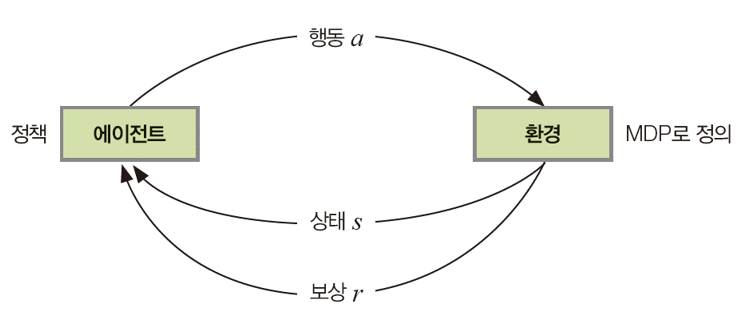

- 상태집합  S = {s1,s2...}
- 행동집합  A = {a1,a2...}
- 보상집합  R = {r1,r2...}
- 보상이 주어지는 시점
  - 즉시보상 : 다중손잡이 밴딧
  - 지연보상 : FrozenLake, 바둑,장기,체스, 비디오 게임


상태전이
  - 결정론적 환경(100% 확률로 새로운 상태가 정해)
    - FrozenLake->right->100% 오른쪽
    - p(s'=2,r=0 |s=1,a=2) = 1.0
      - 상태1에서 행동 2를 하면 새로운상태 2가되고 보상이 0일 확률이 1
  - 스토캐스틱 환경(확률분포에따라 새로운 상태가 다르게 정해지는 환경)
    - Right를 선택해도 일정한 확률로 오른쪽으로 이동하지 않을수 있음
    - 바람 또는 얼음위의 미끄러짐을 흉내


지도 학습(신경망...) VS 강화학습
  - 데이터 : X, Y / 환경에서 수집한 데이터(에피소드)
  - 최적화 : 오차를 최소화 / 누적보상을 최대화
  - 학습 : 오차를 최소화 하는 가중치 / 누저보상을 최대화
  - 평가 : 손실함수 / 가치함수
  - 알고리즘 : SGD(스토캐스틱 그레이디언트 경사하강법) / 동적 프로그래맹, Saras, Q러닝, DQN

벨만 기대 방정식
  - 상태는 서로 밀접한 관련성을 가짐
    - FrozenLake 는 어떤 상태이든지 이동 할 수 있는 상태는 4개

Q러닝을 이용한 FrozenLake문제 해결

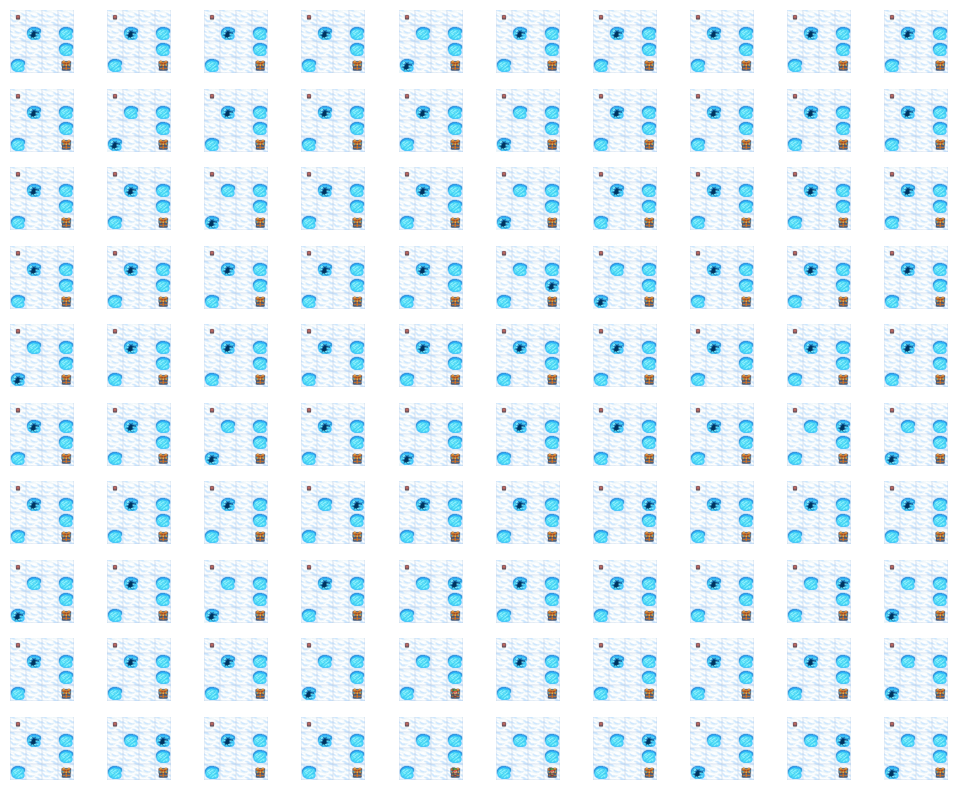

In [25]:
import gym
import numpy as np
import matplotlib.pyplot as plt
env = gym.make('FrozenLake-v1', is_slippery=False)  # is_slippery 미끄러짐 여부1
Q = np.zeros([env.observation_space.n, env.action_space.n])  #Q 배열 초기화 상태및 행동에 대한 가치

rho = 0.8 # 학습률
lamda = 0.99 # 할인율

n_episode = 100
length_episode = 100

episode_rewards = []  # 에피소드 결과 저장
plt.figure(figsize=(10,8))
# 최적 행동 가치 함수 찾기
for i in range(n_episode):
  s = env.reset()   # 새로운 에피소드 시작
  episode_reward = 0 # 에피소드 보상 초기화

  for j in range(length_episode):
    argmaxs = np.argwhere(Q[s,:]== np.amax(Q[s,:])).flatten().tolist()    # 상태 s에 대해서 최대값을 갖는 행동을 모두 찾아 리스트에 저장
    a = np.random.choice(argmaxs) # 무작위로 하나 선택
    s1,r,done,_ =  env.step(a) # 상태s1과 보상 r을 얻습니다.
    # 시각화
    image_data = env.render(mode='rgb_array')
    image_data = np.asarray(image_data,dtype=np.uint8)
    plt.subplot(10,10,i + 1)
    plt.imshow(image_data)
    plt.axis('off')

    Q[s,a] = Q[s,a]+ rho*(r+lamda*np.max(Q[s1,:]-Q[s,a]))  # 보상을 갱신
    s = s1 # 상태를 다음상태로 전이(업데이트)
    episode_reward += r
    if done:
      break
  episode_rewards.append(episode_reward)

np.set_printoptions(precision=2)  # 출력을 소수점 2자리 이하로 설정

plt.tight_layout() # 그림 간격 조정
plt.show()
env.close()

In [27]:
Q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.63, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.77, 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ]])

Q러닝 알고리즘을 이용한 FrozenLake(E-탐욕적용)

In [30]:
env.observation_space.n, env.action_space.n

(16, 4)

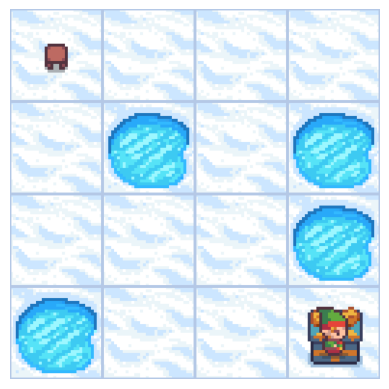

In [33]:
import gym
import numpy as np
import matplotlib.pyplot as plt
env = gym.make('FrozenLake-v1', is_slippery=False)  # is_slippery 미끄러짐 여부1
Q = np.zeros([env.observation_space.n, env.action_space.n])  #Q 배열 초기화 상태및 행동에 대한 가치

rho = 0.9 # 학습률
lamda = 0.99 # 할인율        미래의 보상을 현재 가치로 얼마나 감소시킬지를 결정
eps = 1.0    # 엡실론 비율
eps_decay = 0.999  # 삭감 비율  속도제어, 높은수록 감쇠 속도가 느림

n_episode = 3000
length_episode = 100

# plt.figure(figsize=(10,8))
# 최적 행동 가치 함수 찾기
for i in range(n_episode):
  s = env.reset()   # 새로운 에피소드 시작
  for j in range(length_episode):
    r = np.random.random()
    eps = max(0.01,eps*eps_decay)  # 시간이 지남에 따라서 탐험형 정도를 줄임
    if(r < eps): # 랜덤정책
      a = np.random.randint(0,env.action_space.n)
    else:
      argmaxs = np.argwhere(Q[s,:]== np.amax(Q[s,:])).flatten().tolist()    # 상태 s에 대해서 최대값을 갖는 행동을 모두 찾아 리스트에 저장
      a = np.random.choice(argmaxs) # 무작위로 하나 선택
    s1,r,done,_ =  env.step(a) # 상태s1과 보상 r을 얻습니다.
    Q[s,a] = Q[s,a]+ rho*(r+lamda*np.max(Q[s1,:]-Q[s,a]))  # 보상을 갱신
    s = s1 # 상태를 다음상태로 전이(업데이트)

    # 시각화
    # image_data = env.render(mode='rgb_array')
    # image_data = np.asarray(image_data,dtype=np.uint8)
    # plt.subplot(10,10,i + 1)
    # plt.imshow(image_data)
    # plt.axis('off')
    if done:
      break

np.set_printoptions(precision=2)  # 출력을 소수점 2자리 이하로 설정

# 시각화
image_data = env.render(mode='rgb_array')
image_data = np.asarray(image_data,dtype=np.uint8)
plt.imshow(image_data)
plt.axis('off')
plt.show()
env.close()

In [34]:
Q

array([[1.  , 1.01, 1.01, 1.01],
       [1.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [1.01, 1.01, 0.  , 1.01],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [1.01, 0.  , 1.01, 1.01],
       [1.01, 1.01, 1.01, 0.  ],
       [1.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.01, 1.01, 1.01],
       [1.01, 1.01, 1.01, 1.01],
       [0.  , 0.  , 0.  , 0.  ]])

DQN : 참조표 없이 가치함수를 계산
  - 신경망이 대안(입력과 출력을 연결해 주는 일종의 함수, 가치 함수를 표현할 수 있다)
  - 학습에 사용할 훈련 집합을 수집하는 방법을 찾는것(?? 과연... 강화학습에서 특징벡터-레이블의 샘플 수집이 가능한지?, 레이블은누가 달아주나?)
  - 므니 등은 에피소드에서 샘플을 추출하고 레이블을 자동으로 달아주는 알고리즘을 개발, 비디오 게임에 적용->사람수준의 프로그램

In [ ]:
# 다층퍼셉트론 + 컨볼류션의 신겨망에 Q 러닝을 적용

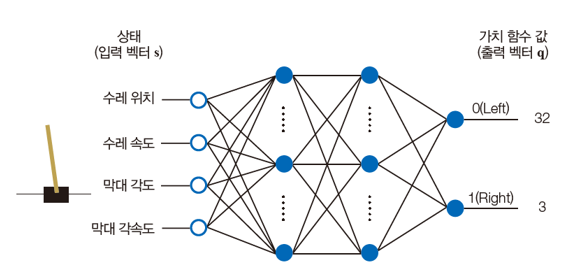

In [ ]:
# 가치 함수를 추정해 주는 신경망

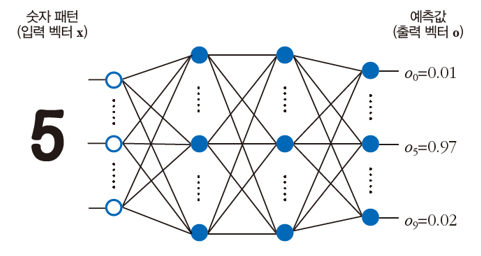

In [35]:
# 최적의 신경망이 있다고 하면 모든게임에서 이길수 있음
# 상태 s에서 q(s,a)를 계산하고 가장 큰 값을 가진 a를 선택하면 됨
# 어떻게 만들까?

In [ ]:
# 훈련집합 수집방법
# Q러닝에서 생성되는 에피소드로부터 샘플을 수집
# 에피소드에서 t순간은 [st, rt]at[st+1,rt+1]

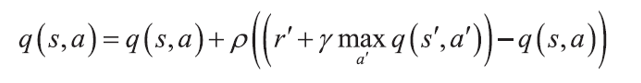

In [ ]:
# 신경망 입장에서 위의 수식을 해석
# 현재 q(s,a)를 신경망의 추정치, 오른쪽 변을 레이블로 간주

리플레이 메모리
  - 샘플간의 상관관계가 높은 문제
  - t가 1->2로 2->3으로, 3->4로 바뀔때 샘플을 수집, 샘플이 유사한 문제가 발생
  - 리플레이 메모리로 해결
    - 추출한 샘플로 바로 학습하는 대신 리플레이 메모리에 저장해 둠
    - 실제 학습은 리플레이 메모리에서 랜덤하게 샘플을 추출하여 미니배치를 구성해서 수행
    - 리플레이 메모리가 꽉 차면 가장 오래된 것을 삭제하고 추가->큐로 구현

CartPole문제
  - 수레를 좌우로 이동해서 막대가 안쓰러지게 하는 게임
  - 상태 s = (수레위치,수레속도,막대각도,막대각속도)
  - 200 단위시간을 넘기면 이김, 단위시간을 넘길때 마다 보상 1을 받음
  - 막대가 12도를 넘거나 위치가 2.4를 넘으면 실패로 간주하고 에피소드가 끝남
  - reset하면 [-0.05, 0.05] 사이에서 초기 위치를 잡고 시작

  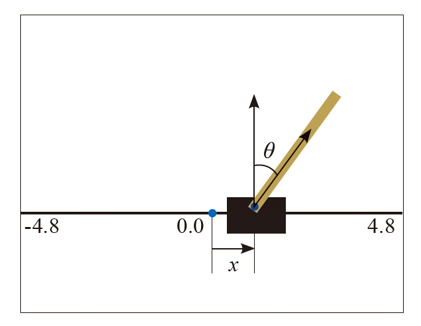

DQN을 이용한 CartPole문제 해결(E-탐욕 적용)

In [36]:
import numpy as np
import random
import gym
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import deque

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16

In [ ]:
# 하이퍼매개변수 설정
rho = 0.9; lamda=0.99; eps = 0.9; eps_decay=0.99; batch_size = 64; n_episode=100

# 신경망을 설계해 주는 함수
def deep_network():
  mlp = Sequential()
  mlp.add(Dense(32,input_dim=env.observation_space.shape[0],activation='relu'))
  mlp.add(Dense(32,activation='relu'))
  mlp.add(Dense(env.action_space.n, activation = 'linear'))  # 누적보상을 출력하기 위해서 linear 사용
  mlp.compile(loss='mse', optimizer='Adam')
  return mlp

def model_learning():
  # 현재상태,행동,보상,다음상태,에피소드끝여부
  mini_batch = np.asarray(random.sample(D,batch_size))
  # 현재상태
  state = np.asarray([mini_batch[i,0] for i in range(batch_size)])
  action = mini_batch[:,1]
  reward = mini_batch[:,2]
  # 다음상태
  state1 = np.asarray([mini_batch[i,3] for i in range(batch_size)])
  # 에피소드의 끝여부
  done = mini_batch[:,4]

  target = model.predict(state) # 현재상태에 대한 신경망 예측결과
  target1 = model.predict(state1) # 다음상태에 대한 신경망 예측결과

  for i in range(batch_size):
    if done[i]:
      target[i][action[i]] = reward[i]
    else:
      target[i][action[i]] += rho*(( reward[i]*lamda*np.amax(target1[i])) - target[i][action[i]])
    # state를 입력, target을 출력으로 학습수행
    model.fit(state,target,batch_size=batch_size,epochs=1,verbose=0)

env= gym.make('CartPole-v0')
#DQN 학습
D = deque(maxlen=2000)  # 리플레이 메모리 초기화
model = deep_network()
scores = []
max_steps = env.spec.max_episode_steps

# 신경망 학습
for i in range(n_episode):
  s = env.reset()
  long_reward = 0

  # 에피소드 처리
  while True:
    r = np.random.random()
    eps = max(0.01,eps*eps_decay)  # 입실론을 조금씩 줄여나감
    if(r < eps):
      a = np.random.randint(0,env.action_space.n)  # 랜덤정책
    else:
      q = model.predict(np.reshape(s,[1,4])) # 신경망이 예측한 행동
      a = np.argmax(q[0])
    s1,r,done,_ = env.step(a)  # 행동a를 취해서 다음상태s1, 보상 r, 에피소드 끝 여부를 결정
    if done and long_reward<max_steps-1:
      r = -100
    D.append((s,a,r,s1,done))  # 리플레이 메모리에 저장
    if len(D) > batch_size*3:  # 모델 학습(리플레이 메모리가 아직 충분치 않은 경우 생략)
      model_learning()
    # 다음 반복을 위해 준비
    s=s1
    long_reward += r
    if done:
      long_reward = long_reward if long_reward == max_steps else long_reward+100
      print(i,"번째 에피소드의 점수 : ",long_reward)
      scores.append(long_reward)
      break
  # 멈춤조건에 도달하지 못했어도 수렴했다고 판단되면 멈춤(최근 5개 에피소드가 최대 보상액의 95%를 넘으면)
  if i>10 and np.mean(scores[-5:]) > (0.95*max_steps):
    break
# 신경망 저장
model.save('./cartpole_by_DQN.h5')
env.close()

# 학습결과 시각화
import matplotlib.pyplot as plt
plt.plot(range(1,len(scores)+1),scores)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.grid()
plt.show()


In [55]:
!pip install pyvirtualdisplay

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:


from tensorflow.keras.models import load_model
import time
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
from IPython import display



# 학습된 신경망 로드
model = load_model('/content/cartpole_by_DQN.h5')
env = gym.make('CartPole-v1')
env.action_space.seed(42)

long_reward = 0
# 플레이
s = env.reset()
while True:
  q = model.predict(np.reshape(s,[1,4]))  # 신경망이 예측한 행동
  a = np.argmax(q[0])
  s1,r,done,_ = env.step(a)
  s = s1
  long_reward += r

  # env.render()
  plt.imshow(env.render(mode='rgb_array'))
  display.clear_output(wait = True)
  display.display(plt.gcf())

  time.sleep(0.01)  # 에니메이션 지연속도
  if done:
    print('에피소드 점수 : ',long_reward)
    break
env.close()

FileNotFoundError: ignored